In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 数据加载

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
x_train.min(), x_train.max(), x_train.mean()

(0, 255, 33.318421449829934)

In [11]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [13]:
y_train[:4]

array([5, 0, 4, 1], dtype=uint8)

In [14]:
y_onehot = tf.one_hot(y_train, depth=10)

In [15]:
y_onehot[:2]

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

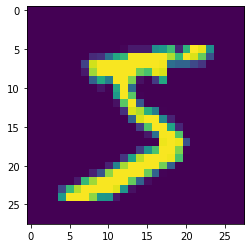

In [16]:
plt.imshow(x_train[0])

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [8]:
x_train.shape, y_train.shape, x_test. shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [9]:
x_train.min(), x_train.max()

(0, 255)

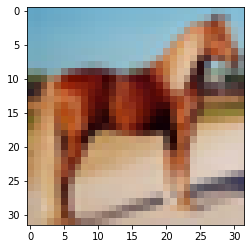

In [13]:
plt.imshow(x_train[43])

In [15]:
y_train[:4]

array([[6],
       [9],
       [9],
       [4]], dtype=uint8)

In [16]:
# 转换成tensor
db = tf.data.Dataset.from_tensor_slices(x_test)

In [18]:
type(db)

(tensorflow.python.data.ops.dataset_ops.TensorSliceDataset, numpy.ndarray)

In [19]:
next(iter(db)).shape

TensorShape([32, 32, 3])

In [20]:
db = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [21]:
next(iter(db))[0].shape

TensorShape([32, 32, 3])

In [22]:
# 将数据打乱，数值越大，混乱程度越大
db = db.shuffle(10000)

In [23]:
def preprocess(x,y):
    # 数据类型转换
    x = tf.cast(x, dtype=tf.float32)
    y = tf.cast(y, dtype=tf.int32)
    y = tf.one_hot(y, depth=10)
    return x,y

In [24]:
# 映射
db2 = db.map(preprocess)

In [25]:
res = next(iter(db2))

In [30]:
res[0].shape, res[1].shape

(TensorShape([32, 32, 3]), TensorShape([1, 10]))

In [31]:
res[1][:2]

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)>

In [32]:
# 每个batch的大小为32
db3 = db2.batch(32)

In [33]:
res = next(iter(db3))

In [35]:
res[0].shape, res[1].shape

(TensorShape([32, 32, 32, 3]), TensorShape([32, 1, 10]))

In [36]:
# repeat 可指定对整个数据集的迭代次数
# 不停的迭代
db4 = db3.repeat()

In [37]:
# 迭代两次
db4 = db3.repeat(2)

In [39]:
def prepare_mnist_features_and_labels(x,y):
    # 归一化 deep learn中一般数据为float32
    x = tf.cast(x, tf.float32) / 255.0
    y = tf.cast(y, tf.int64)
    
    return x, y

In [42]:
def mnist_dataset():
    (x, y), (x_val, y_val) = keras.datasets.fashion_mnist.load_data()
    y = tf.one_hot(y, depth=10)
    y_val = tf.one_hot(y_val,depth=10)
    
    ds = tf.data.Dataset.from_tensor_slices((x,y))
    ds = ds.map(prepare_mnist_features_and_labels)
    ds = ds.shuffle(60000).batch(100)
    ds_val = tf.data.Dataset.from_tensor_slices((x_val, y_val))
    ds_val = ds_val.map(prepare_mnist_features_and_labels)
    ds_val = ds_val.shuffle(10000).batch(100)
    
    return ds, ds_val

In [46]:
data_train, data_val = mnist_dataset()

In [48]:
data_train = iter(data_train)

In [61]:
sample = next(data_train)[0][1]

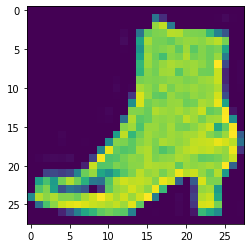

In [62]:
plt.imshow(sample)